
# Exploring Sonoma County animal shelter intake and outcome data
## Data source
For this data analysis, we are using the Sonoma County Animal Shelter Intake and Outcome dataset collected and made publicly available by Sonoma County with the purpose of helping the community better understand the animals being cared for by the shelter.

The dataset includes each animal’s name, type, breed, color, sex, size, date of birth, kennel/impound details and ID, intake/outcome date, days in shelter, intake/outcome types, health condition, and outcome location. The data spans from January 2014 to December 2025.

## Questions we seek to answer
- What types of animals are cared for by the shelter?
- How many animals come into/leave the shelter each month?
- Has the number of intakes increased or decreased over time?
- During which month does the shelter have the most intakes?
- What are the most common outcomes?
- Is gender a factor in how long an animal stays at the shelter?
- Is age a factor in how long an animal stays at the shelter before being adopted?
- Has the adoption rate increased or decreased over time?
- Are we able to predict an animal's outcome based on certain factors?

## Importing needed libraries/modules and reading the data from the CSV
To begin, we imported the packages we will be using to hold/manipulate the data (pandas, numpy, scipy), to plot/map/vizualize the data (matplotlib.pyplot, gmplot, IPython.display, seaborn), and to build a prediction model (sklearn). As we developed, we encapsulated commonly used functions into a separate .py file that can be accessed globally. We also import our dataset from an external CSV as a Pandas dataframe.

## Importing needed libraries/modules

In [1]:
# Importing needed libraries/modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


## Load data

In [2]:
shelter_df = pd.read_csv("../data/animal_shelter_data.csv")
shelter_df.head()

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Impound Number,Kennel Number,Animal ID,...,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count
0,NaN,DOG,SIBERIAN HUSKY,BLACK/WHITE,Male,MED,NaN,K23-046984,DA21,A422697,...,FLD_STRAY,EUTHANIZE,AGGRESSIVE,UNKNOWN,UNTREATABLE,COUNTY,NaN,NaN,NaN,1
1,NaN,DOG,PIT BULL,GRAY,Female,MED,NaN,K23-046923,DS60,A422443,...,FLD_STRAY,EUTHANIZE,BEH SEVERE,UNKNOWN,UNTREATABLE,SANTA ROSA,NaN,NaN,NaN,1
2,NaN,DOG,GERM SHEPHERD,TAN/BLACK,Female,LARGE,11/11/2021,K23-046766,DS80,A422038,...,FIELD,EUTHANIZE,AGGRESSIVE,UNKNOWN,UNTREATABLE,COUNTY,NaN,NaN,NaN,1
3,FAUNA,DOG,GERM SHEPHERD,FAWN,Spayed,SMALL,06/08/2021,K24-047284,DS68,A423685,...,OVER THE COUNTER,RETURN TO OWNER,NaN,UNKNOWN,HEALTHY,SANTA ROSA,NaN,93927.0,"93927(36.32153, -121.24627)",1
4,WILLOW,DOG,SHIH TZU,WHITE,Female,SMALL,04/04/2012,K24-048085,DS90,A425655,...,FLD_STRAY,RETURN TO OWNER,OVER THE COUNTER_CALL,UNKNOWN,PENDING,SANTA ROSA,SANTA ROSA,95401.0,"95401(38.44366, -122.7246163)",1


## Prelim EDA

### Check datatypes

In [3]:
shelter_df.dtypes

Name                        str
Type                        str
Breed                       str
Color                       str
Sex                         str
Size                        str
Date Of Birth               str
Impound Number              str
Kennel Number               str
Animal ID                   str
Intake Date                 str
Outcome Date                str
Days in Shelter           int64
Intake Type                 str
Intake Subtype              str
Outcome Type                str
Outcome Subtype             str
Intake Condition            str
Outcome Condition           str
Intake Jurisdiction         str
Outcome Jurisdiction        str
Outcome Zip Code        float64
Location                    str
Count                     int64
dtype: object

In [4]:
# Set column names to snake case
shelter_df.columns = shelter_df.columns.str.strip().str.lower().str.replace(' ', '_')
shelter_df.dtypes

name                        str
type                        str
breed                       str
color                       str
sex                         str
size                        str
date_of_birth               str
impound_number              str
kennel_number               str
animal_id                   str
intake_date                 str
outcome_date                str
days_in_shelter           int64
intake_type                 str
intake_subtype              str
outcome_type                str
outcome_subtype             str
intake_condition            str
outcome_condition           str
intake_jurisdiction         str
outcome_jurisdiction        str
outcome_zip_code        float64
location                    str
count                     int64
dtype: object

### Check for missing data

In [5]:
shelter_df.isnull().sum()

name                    8551
type                       0
breed                      0
color                      0
sex                        0
size                      37
date_of_birth           7814
impound_number             0
kennel_number              8
animal_id                  0
intake_date                0
outcome_date             154
days_in_shelter            0
intake_type                0
intake_subtype             0
outcome_type             161
outcome_subtype          512
intake_condition           0
outcome_condition        528
intake_jurisdiction        0
outcome_jurisdiction    4692
outcome_zip_code        4651
location                4651
count                      0
dtype: int64

## Cleaning up/converting data
### Converting the name; birth, intake, and outcome date; and outcome type columns
After importing the CSV file as a Pandas dataframe, we clean up some of the data---replacing blanks in the Name column to "No name", converting all dates to a datetime object, replacing blanks in the Outcome Type column to Pending, and removing any duplicate categories in the Intake Type and Outcome Type columns---using .fillna(), .replace(), and .mask().

### Check Intake/Outcome Types

In [6]:
shelter_df['intake_type'].value_counts()

intake_type
STRAY              23699
OWNER SURRENDER     3715
CONFISCATE          3021
QUARANTINE          1113
ADOPTION RETURN      519
TRANSFER             432
BORN HERE            148
OS APPT                7
Name: count, dtype: int64

In [7]:
shelter_df['outcome_type'].value_counts()

outcome_type
RETURN TO OWNER    10754
ADOPTION            9294
TRANSFER            7185
EUTHANIZE           4523
DISPOSAL             344
DIED                 237
RTOS                  82
VET                   35
SHELTER               20
ESCAPED/STOLEN        19
Name: count, dtype: int64

In [8]:
# Replacing all NaN values of name column with "Unknown"
shelter_df["name"] = shelter_df["name"].fillna("Unknown")

# Converts string dates to datetime dtypes
shelter_df["date_of_birth"] = pd.to_datetime(shelter_df["date_of_birth"])
shelter_df["intake_date"] = pd.to_datetime(shelter_df["intake_date"])
shelter_df["outcome_date"] = pd.to_datetime(shelter_df["outcome_date"])

# Convert float zip code with int
shelter_df["outcome_zip_code"] = shelter_df["outcome_zip_code"].astype(str).str.replace(".0", "")

# Replacing all NaN values of outcome type column with "Pending"
shelter_df["outcome_type"] = shelter_df["outcome_type"].fillna("Pending")

# Remove any duplicate categories
# Replacing all RTOS values of outcome type column with "RETURN TO OWNER"
shelter_df["outcome_type"] = shelter_df["outcome_type"].replace("RTOS", "RETURN TO OWNER")
# Replacing all OS APPT values of intake type column with "OWNER SURRENDER"
shelter_df["intake_type"] = shelter_df["intake_type"].mask(shelter_df["intake_type"] == "OS APPT", "OWNER SURRENDER")

In [9]:
shelter_df.dtypes

name                               str
type                               str
breed                              str
color                              str
sex                                str
size                               str
date_of_birth           datetime64[us]
impound_number                     str
kennel_number                      str
animal_id                          str
intake_date             datetime64[us]
outcome_date            datetime64[us]
days_in_shelter                  int64
intake_type                        str
intake_subtype                     str
outcome_type                       str
outcome_subtype                    str
intake_condition                   str
outcome_condition                  str
intake_jurisdiction                str
outcome_jurisdiction               str
outcome_zip_code                   str
location                           str
count                            int64
dtype: object

In [10]:
shelter_df["sex"].value_counts()

sex
Neutered    10205
Spayed       8517
Male         5962
Female       5064
Unknown      2906
Name: count, dtype: int64

In [11]:
# Separating sex and spay/neuter status
# If sex is listed (rather than Neutered or Spayed), it is assumed that the animal is not spayed/neutered.
shelter_df["fixed"] = shelter_df["sex"]
shelter_df["fixed"] = shelter_df["fixed"].replace("Female", "Unaltered")
shelter_df["fixed"] = shelter_df["fixed"].replace("Male", "Unaltered")
shelter_df["sex"] = shelter_df["sex"].replace("Neutered", "Male")
shelter_df["sex"] = shelter_df["sex"].replace("Spayed", "Female")

shelter_df[["sex", "fixed"]].head()

,sex,fixed
0,Male,Unaltered
1,Female,Unaltered
2,Female,Unaltered
3,Female,Spayed
4,Female,Unaltered


In [12]:
# Find age in days of animal on intake date if birth date provided
shelter_df["age_at_intake"] = (shelter_df["intake_date"] - shelter_df["date_of_birth"]).dt.days.clip(lower=0)
shelter_df["age_at_outcome"] = (shelter_df["outcome_date"] - shelter_df["date_of_birth"]).dt.days

# Creating age groups
def assign_group(age):
    if age < 366:
        return "Young"
    if 366 <= age < 3650:
        return "Adult"
    if 3650 <= age:
        return "Senior"
    if age == "NaN":
        return "Unknown"
    

shelter_df = shelter_df.assign(age_group = shelter_df['age_at_outcome'].map(assign_group))

In [13]:
shelter_df[shelter_df["age_at_outcome"] < 0][["name",	"type", "breed", "size", "date_of_birth", "intake_date", "age_at_intake", "outcome_date", "age_at_outcome"]]

,name,type,breed,size,date_of_birth,intake_date,age_at_intake,outcome_date,age_at_outcome
116,ROCKWELL NORMAN,DOG,PIT BULL,LARGE,2020-04-19,2020-02-01,0.0,2020-02-04,-75.0
5311,KARMA,DOG,PIT BULL,MED,2018-11-20,2018-04-02,0.0,2018-04-07,-227.0
5792,DOMINO,DOG,ALASKAN HUSKY,MED,2020-07-06,2019-10-01,0.0,2019-10-19,-261.0
6928,CASPER,DOG,LABRADOR RETR,LARGE,2019-05-01,2019-04-06,0.0,2019-04-06,-25.0
9756,STELLA,DOG,GERM SHEPHERD,LARGE,2018-06-29,2018-04-07,0.0,2018-04-07,-83.0
11313,STELLA,DOG,GERM SHEPHERD,LARGE,2018-06-29,2018-06-13,0.0,2018-06-13,-16.0
12043,LEE,DOG,AMER BULLDOG/MIX,LARGE,2014-09-14,2014-02-25,0.0,2014-02-25,-201.0
13273,APOLO,DOG,ALASKAN HUSKY/MIX,MED,2020-03-07,2019-03-09,0.0,2019-03-12,-361.0
15992,OSO,DOG,GERM SHEPHERD,PUPPY,2015-12-07,2013-12-29,0.0,2014-01-18,-688.0
21275,JACK,DOG,SHIH TZU,SMALL,2019-04-14,2016-11-04,0.0,2016-11-04,-891.0


In [14]:
shelter_df.loc[shelter_df["age_at_outcome"] < 0, "date_of_birth"] = pd.NaT
shelter_df.loc[shelter_df["age_at_outcome"] < 0, ["age_at_intake", "age_at_outcome"]] = np.nan
shelter_df[shelter_df["age_at_outcome"] < 0][["name",	"type", "breed", "size", "date_of_birth", "intake_date", "age_at_intake", "outcome_date", "age_at_outcome"]]

,name,type,breed,size,date_of_birth,intake_date,age_at_intake,outcome_date,age_at_outcome


In [15]:
max_date = shelter_df["outcome_date"].max()
effective_outcome = shelter_df["outcome_date"].fillna(max_date)

shelter_df["days_in_shelter"] = np.where(
    shelter_df["age_at_intake"] <= 0,
    (effective_outcome - shelter_df["date_of_birth"]).dt.days,
    shelter_df["days_in_shelter"]
)

In [16]:
pd.reset_option("display.max_rows")

In [17]:
shelter_df[shelter_df["age_at_intake"] == 0][["name",	"type", "breed", "size", "date_of_birth", "intake_date", "age_at_intake", "outcome_date", "age_at_outcome", "days_in_shelter"]]

,name,type,breed,size,date_of_birth,intake_date,age_at_intake,outcome_date,age_at_outcome,days_in_shelter
457,Unknown,DOG,GERM SHEPHERD,PUPPY,2025-06-07,2025-06-07,0.0,2025-06-11,4.0,4.0
628,Unknown,DOG,GERM SHEPHERD,PUPPY,2025-06-07,2025-06-07,0.0,2025-06-11,4.0,4.0
641,Unknown,DOG,GERM SHEPHERD,PUPPY,2025-06-07,2025-06-07,0.0,2025-06-11,4.0,4.0
677,Unknown,DOG,GERM SHEPHERD,PUPPY,2025-06-07,2025-06-07,0.0,2025-06-11,4.0,4.0
693,Unknown,DOG,GERM SHEPHERD,PUPPY,2025-06-07,2025-06-07,0.0,2025-06-11,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...
32513,*NEWT,CAT,DOMESTIC SH,KITTN,2025-07-21,2025-07-21,0.0,2025-11-05,107.0,107.0
32534,*JAMES,CAT,DOMESTIC SH,KITTN,2025-06-25,2025-06-25,0.0,2025-09-09,76.0,76.0
32541,*JOE,CAT,DOMESTIC SH,KITTN,2025-06-25,2025-06-25,0.0,2025-09-09,76.0,76.0
32605,*MATLOCK,CAT,DOMESTIC SH,KITTN,2025-07-21,2025-07-21,0.0,2025-11-08,110.0,110.0


## Preview the data

In [18]:
display(shelter_df)

,name,type,breed,color,sex,size,date_of_birth,impound_number,kennel_number,animal_id,...,outcome_condition,intake_jurisdiction,outcome_jurisdiction,outcome_zip_code,location,count,fixed,age_at_intake,age_at_outcome,age_group
0,Unknown,DOG,SIBERIAN HUSKY,BLACK/WHITE,Male,MED,NaT,K23-046984,DA21,A422697,...,UNTREATABLE,COUNTY,NaN,NaN,NaN,1,Unaltered,NaN,NaN,NaN
1,Unknown,DOG,PIT BULL,GRAY,Female,MED,NaT,K23-046923,DS60,A422443,...,UNTREATABLE,SANTA ROSA,NaN,NaN,NaN,1,Unaltered,NaN,NaN,NaN
2,Unknown,DOG,GERM SHEPHERD,TAN/BLACK,Female,LARGE,2021-11-11,K23-046766,DS80,A422038,...,UNTREATABLE,COUNTY,NaN,NaN,NaN,1,Unaltered,730.0,788.0,Adult
3,FAUNA,DOG,GERM SHEPHERD,FAWN,Female,SMALL,2021-06-08,K24-047284,DS68,A423685,...,HEALTHY,SANTA ROSA,NaN,93927,"93927(36.32153, -121.24627)",1,Spayed,941.0,944.0,Adult
4,WILLOW,DOG,SHIH TZU,WHITE,Female,SMALL,2012-04-04,K24-048085,DS90,A425655,...,PENDING,SANTA ROSA,SANTA ROSA,95401,"95401(38.44366, -122.7246163)",1,Unaltered,4383.0,4384.0,Senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32649,*SAL,CAT,DOMESTIC SH,BLACK/WHITE,Female,KITTN,2025-05-23,K25-052492,WESTFARM,A434856,...,HEALTHY,SANTA ROSA,SANTA ROSA,95409,"95409(38.46382, -122.67058)",1,Spayed,34.0,118.0,Young
32650,LUNA,CAT,DOMESTIC SH,BLACK,Female,SMALL,2025-06-03,K25-052530,WESTFARM,A434912,...,HEALTHY,SANTA ROSA,COUNTY,95403,"95403(38.51311, -122.75502)",1,Spayed,25.0,107.0,Young
32651,33318,CAT,DOMESTIC SH,BLUE,Unknown,KITTN,2025-08-05,K25-053327,HSSC,A436586,...,PENDING,COUNTY,COUNTY,95407,"95407(38.41483, -122.72707)",1,Unknown,31.0,44.0,Young
32652,Unknown,DOG,LABRADOR RETR/PIT BULL,BLACK,Male,LARGE,NaT,K25-053292,DS95,A436490,...,HEALTHY,SANTA ROSA,NaN,NaN,NaN,1,Unaltered,NaN,NaN,NaN


## Data Visualizations

In [36]:
# Visualization Functions

months = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7: "Jul",
          8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"}


# Plot monthly outcomes/intakes and intake averages
def monthly_in_out(count, year, category):
    labels = [months[x] for x in count.index.values]
    
    fig, ax = plt.subplots(figsize=(6, 4))
    fig.patch.set_facecolor("#FFF0E6")
    ax.set_facecolor("#FFF0E6")
    
    bars = ax.bar(count.index.values, count, width=0.6, color="#7D6B7D")
    ax.bar_label(bars, fontsize=10)
    
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    
    ax.yaxis.grid(True, color="white", linewidth=1)
    ax.set_axisbelow(True)
    
    ax.set_title(f"Number of {category} per Month ({year})", size=16, weight="light", pad=20)
    ax.set_ylabel(category)
    ax.set_xlabel("Month")
    ax.set_xticks(count.index.values)
    ax.set_xticklabels(labels)
    
    plt.tight_layout()
    plt.show()
    

# Plot outcome and animal type pie charts
def type_pie_chart(types, title):
    types_formatted = [f"{x.title()} ({v/types.sum()*100:.1f}%)" 
                       for x, v in zip(types.index.values, types)]

    fig, ax = plt.subplots(figsize=(6, 3))
    fig.patch.set_facecolor("#FFF0E6")
    ax.set_facecolor("#FFF0E6")
    
    wedges, _ = ax.pie(types,
                       startangle=180,
                       colors=("#B5C4B1", "#7D6B7D", "#C9847A", "#F4ACB7", "#B8A9C9", "#E8C5A0", "#9DB4C0", "#9D8189", "#FFCAD4", "#D8E2DC"),
                       textprops={"color": "black"})

    ax.legend(wedges, types_formatted,
              loc="upper left",
              bbox_to_anchor=(1, 0, 0.5, 1),
              frameon=False)

    ax.set_title(title, size=16, weight="light")

    plt.show()


# Converts age in days to years
def convertAgeToYears(age):
    return age/365.24    


# Requests user input for a specific year
def get_year_input():
    prompt = "Enter a year between 2013 and 2026: "
    year = input(prompt)
    while not year.isnumeric() or not (2013 <= int(year) <= 2026):
        print("Invalid input")
        year = input(prompt)
    return int(year)


### Animal Types

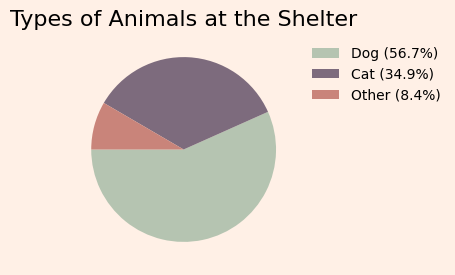

In [20]:
# Obtain counts for each animal type
animal_types = shelter_df["type"].value_counts()

# Plot data on pie chart
type_pie_chart(animal_types, "Types of Animals at the Shelter")

### Animal intakes
#### Animal intakes per month

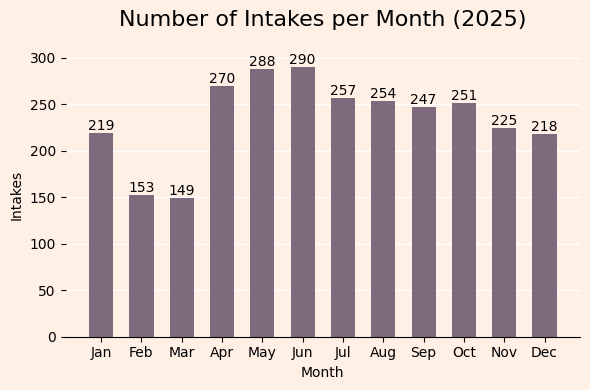

Total intakes for 2025: 2,821


In [21]:
# Ask for user input for year and count instances of each month
year = get_year_input()
df_in_date = shelter_df[shelter_df["intake_date"].dt.year == year]
total_annual_intakes = len(df_in_date)
monthly_intakes = df_in_date["intake_date"].dt.month.value_counts().sort_index()

# Plot monthly intakes
monthly_in_out(monthly_intakes, year, "Intakes")
print(f"Total intakes for {year}: {total_annual_intakes:,}")

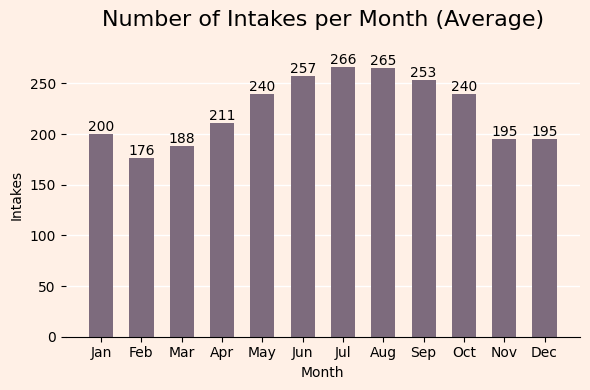

In [22]:
# Filtering out 2013 and 2026 since data for those years is incomplete
filtered_df = shelter_df[~shelter_df["intake_date"].dt.year.isin([2013, 2026])]

# Find average number of intakes for each month
all_monthly_intakes = filtered_df["intake_date"].dt.month.value_counts().sort_index().to_numpy()
num_of_years = filtered_df["intake_date"].dt.year.nunique()
avg_monthly_intakes = pd.Series((all_monthly_intakes / num_of_years).round(), index=range(1, 13))

# Plot monthly averages for intakes
monthly_in_out(avg_monthly_intakes, "Average", "Intakes")

### Outcomes
#### Outcome types

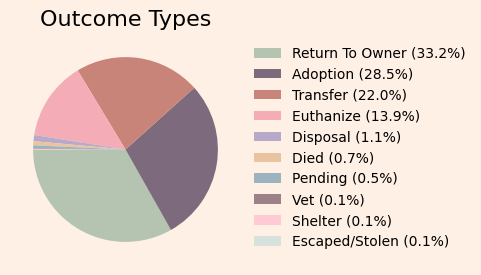

In [23]:
# Obtain counts for each animal type
outcomes = shelter_df["outcome_type"].value_counts()

# Plot outcome types
type_pie_chart(outcomes, "Outcome Types")

#### Outcomes per month

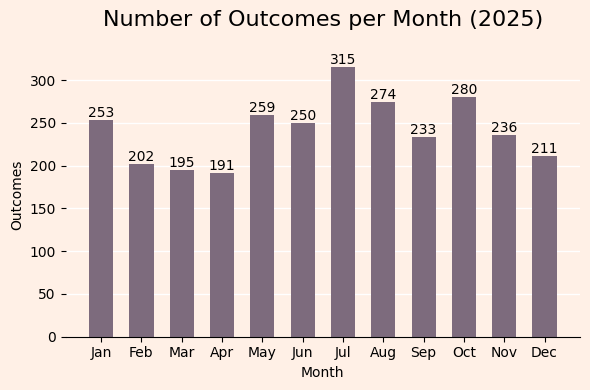

Total outcomes for 2025: 2,899


In [24]:
# Ask for user input for year and count instances of each month
year = get_year_input()
df_out_date = shelter_df[shelter_df["outcome_date"].dt.year == year]
total_annual_outcomes = len(df_out_date)
monthly_outcomes = df_out_date["outcome_date"].dt.month.value_counts().sort_index()

# Plot monthly outcomes
monthly_in_out(monthly_outcomes, year, "Outcomes")
print(f"Total outcomes for {year}: {total_annual_outcomes:,}")

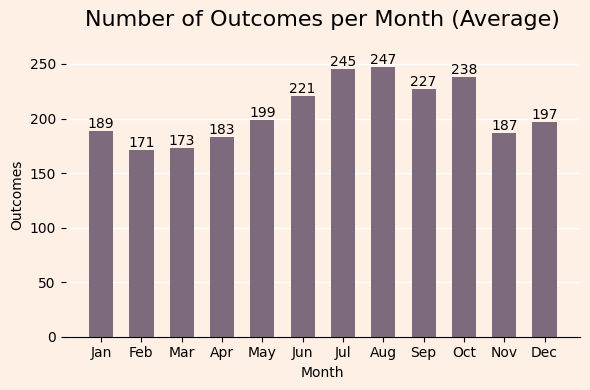

In [25]:
# Find average number of outcomes for each month
all_monthly_outcomes = filtered_df["outcome_date"].dt.month.value_counts().sort_index().to_numpy()
num_of_years = filtered_df["outcome_date"].dt.year.nunique()
avg_monthly_outcomes = pd.Series((all_monthly_outcomes / num_of_years).round(), index=range(1, 13))

# Plot monthly averages for intakes
monthly_in_out(avg_monthly_outcomes, "Average", "Outcomes")

### Length of stay at shelter

 Length of stay is the amount of time, from the time of the animal's intake to the time of the animal's outcome, an animal is in the shelter. Animals with longer lengths of stay typically require the allocation of more resources to get them out of the shelter.

Mean length of stay: 20.5 days.
Median length of stay: 9.0 days.
Mode: 0.0 days (18.00% of animals).
Animals staying longer than 30 days: 20.69%
Animals staying longer than 60 days: 7.38%


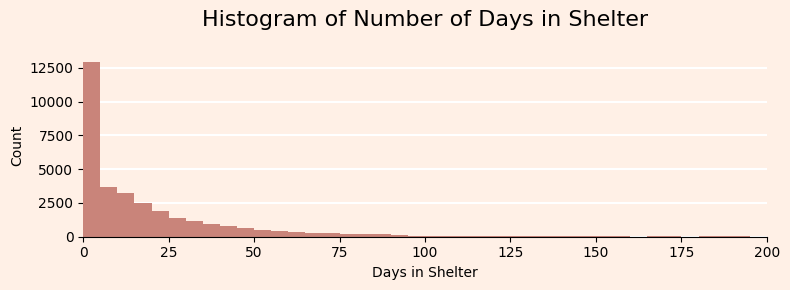

In [ ]:
los = shelter_df["days_in_shelter"]

avg_los = los.mean()
median_los = los.median()
mode_result = stats.mode(los, keepdims=True)
mode_val = mode_result[0][0]
mode_pct = mode_result[1][0] / len(los)

print(f"Mean length of stay: {avg_los:.3} days.")
print(f"Median length of stay: {median_los:.3} days.")
print(f"Mode: {mode_val} days ({mode_pct:.2%} of animals).")
print(f"Animals staying longer than 30 days: {(los > 30).mean():.2%}")
print(f"Animals staying longer than 60 days: {(los > 60).mean():.2%}")

binwidth = 5
fig, ax = plt.subplots(figsize=(8, 3))
fig.patch.set_facecolor("#FFF0E6")
ax.set_facecolor("#FFF0E6")
ax.hist(los, bins=range(int(los.min()), int(los.max()) + binwidth, binwidth), color="#C9847A")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.yaxis.grid(True, color="white", linewidth=1)
ax.set_axisbelow(True)
ax.set_title("Histogram of Number of Days in Shelter", size=16, weight="light", pad=20)
ax.set_xlabel("Days in Shelter")
ax.set_ylabel("Count")
ax.set_xlim(0, 200)
plt.tight_layout()
plt.show()

#### Sex and length of stay

sex
Female     22.76
Male       21.42
Unknown     6.44 

fixed
Neutered    26.63
Spayed      28.11 



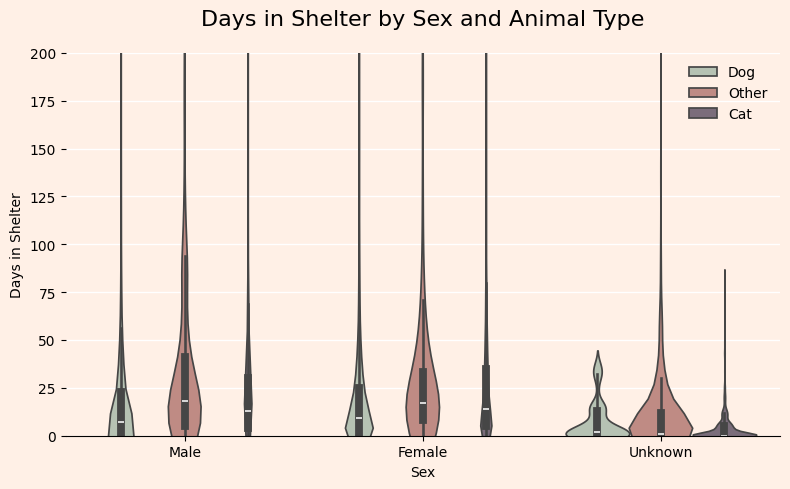

In [ ]:
print(shelter_df.groupby("sex")["days_in_shelter"].mean().round(2).to_string(), "\n")
print(shelter_df[shelter_df["fixed"].isin(["Neutered", "Spayed"])].groupby("fixed")["days_in_shelter"].mean().round(2).to_string(), "\n")

fig, ax = plt.subplots(figsize=(8, 5))
fig.patch.set_facecolor("#FFF0E6")
ax.set_facecolor("#FFF0E6")

sns.violinplot(data=shelter_df, x="sex", y="days_in_shelter", hue="type",
           order=["Male", "Female", "Unknown"],
           palette=["#B5C4B1", "#C9847A", "#7D6B7D"],
           ax=ax)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.yaxis.grid(True, color="white", linewidth=1)
ax.set_axisbelow(True)
ax.set_title("Days in Shelter by Sex and Animal Type", size=16, weight="light", pad=20)
ax.set_xlabel("Sex")
ax.set_ylabel("Days in Shelter")
ax.set_ylim(0, 200)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [l.title() for l in labels], frameon=False)
plt.tight_layout()
plt.show()

#### Age and length of stay for adopted animals

Average age entering shelter: 3.34 years, average age of adopted animals: 1.76 years.
Average LOS for adopted animals: 38.99 days vs 20.52 days overall.
Average LOS by age group:
type   age_group
CAT    Adult        34.65
       Senior       43.25
       Young        32.03
DOG    Adult        52.17
       Senior       85.84
       Young        31.71
OTHER  Adult        51.92
       Senior       90.33
       Young        48.30


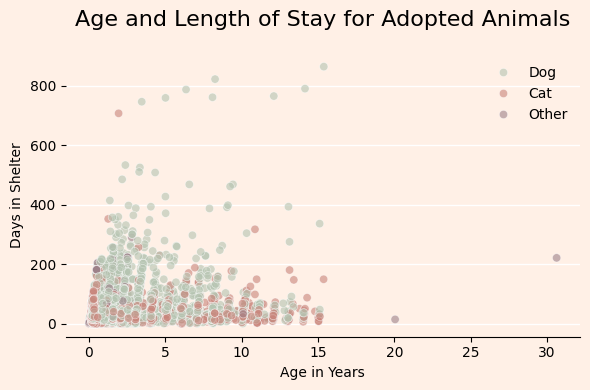

In [43]:
adopted = shelter_df[shelter_df["outcome_type"] == "ADOPTION"]

avg_age = shelter_df["age_at_intake"].mean() / 365
avg_age_adopted = adopted["age_at_outcome"].mean() / 365
avg_los_adopted = adopted["days_in_shelter"].mean()
age_group_avg = adopted.groupby(["type", "age_group"])["days_in_shelter"].mean().round(2)

print(f"Average age entering shelter: {avg_age:.2f} years, average age of adopted animals: {avg_age_adopted:.2f} years.")
print(f"Average LOS for adopted animals: {avg_los_adopted:.2f} days vs {los.mean():.2f} days overall.")
print(f"Average LOS by age group:\n{age_group_avg.round(2).to_string()}")

fig, ax = plt.subplots(figsize=(6, 4))
fig.patch.set_facecolor("#FFF0E6")
ax.set_facecolor("#FFF0E6")

sns.scatterplot(data=adopted, x=adopted["age_at_outcome"] / 365, y="days_in_shelter",
                hue="type", palette=["#B5C4B1", "#C9847A", "#9D8189"],
                alpha=0.6, ax=ax)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.yaxis.grid(True, color="white", linewidth=1)
ax.set_axisbelow(True)
ax.set_title("Age and Length of Stay for Adopted Animals", size=16, weight="light", pad=20)
ax.set_xlabel("Age in Years")
ax.set_ylabel("Days in Shelter")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [l.title() for l in labels], frameon=False)
plt.tight_layout()
plt.show()

In [32]:
shelter_df.loc[shelter_df["age_at_outcome"] > 10000] 

,name,type,breed,color,sex,size,date_of_birth,impound_number,kennel_number,animal_id,...,outcome_condition,intake_jurisdiction,outcome_jurisdiction,outcome_zip_code,location,count,fixed,age_at_intake,age_at_outcome,age_group
1842,EDWINA,OTHER,DONKEY,BROWN/GRAY,Female,LARGE,1989-06-05,K19-032550,FOSTER,A388031,...,HEALTHY,COUNTY,COUNTY,95492,"95492(38.541355, -122.80026)",1,Unaltered,10957.0,11179.0,Senior


### Adoptions
#### Animal adoption rate

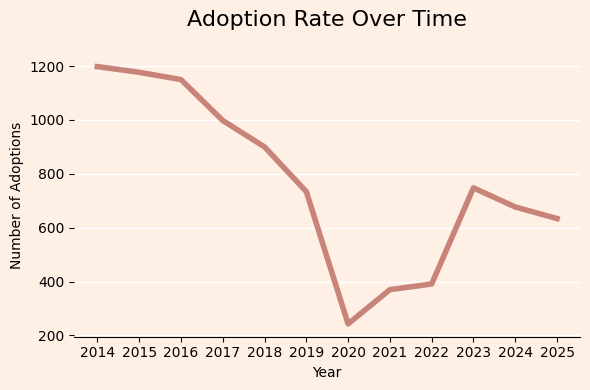

In [42]:
adoptions = shelter_df[shelter_df["outcome_type"] == "ADOPTION"]
yearly_adoptions = adoptions["outcome_date"].dt.year.value_counts().sort_index()
yearly_adoptions = yearly_adoptions[yearly_adoptions.index != 2026]

fig, ax = plt.subplots(figsize=(6, 4))
fig.patch.set_facecolor("#FFF0E6")
ax.set_facecolor("#FFF0E6")
ax.plot(yearly_adoptions, linewidth=4, color="#C9847A")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.yaxis.grid(True, color="white", linewidth=1)
ax.set_axisbelow(True)
ax.set_title("Adoption Rate Over Time", size=16, weight="light", pad=20)
ax.set_xticks(yearly_adoptions.index)
ax.set_ylabel("Number of Adoptions")
ax.set_xlabel("Year")
plt.tight_layout()
plt.show()

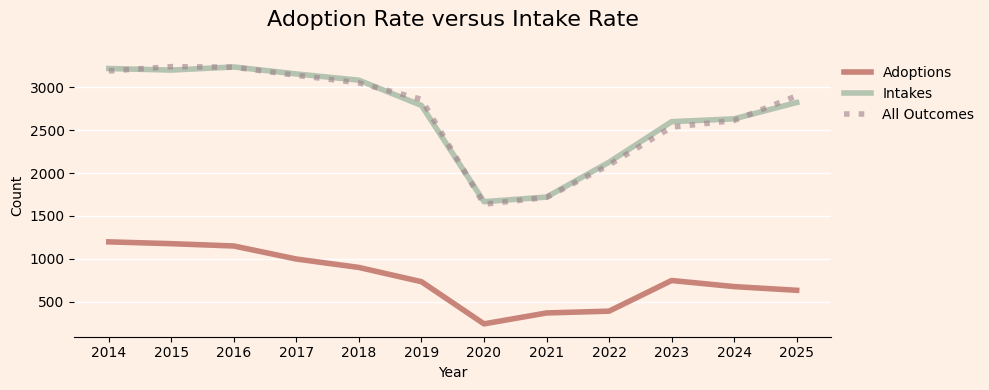

In [41]:
yearly_intakes = shelter_df["intake_date"].dt.year.value_counts().sort_index()
yearly_intakes = yearly_intakes[~yearly_intakes.index.isin([2013, 2026])]

yearly_outcomes = shelter_df["outcome_date"].dt.year.value_counts().sort_index()
yearly_outcomes = yearly_outcomes[~yearly_outcomes.index.isin([2013, 2026])]

fig, ax = plt.subplots(figsize=(10, 4))
fig.patch.set_facecolor("#FFF0E6")
ax.set_facecolor("#FFF0E6")
ax.plot(yearly_adoptions, label="Adoptions", linewidth=4, color="#C9847A")
ax.plot(yearly_intakes, label="Intakes", linewidth=4, color="#B5C4B1")
ax.plot(yearly_outcomes, label="All Outcomes", linewidth=4, color="#9D8189", linestyle=":", alpha=0.6)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.yaxis.grid(True, color="white", linewidth=1)
ax.set_axisbelow(True)
ax.set_title("Adoption Rate versus Intake Rate", size=16, weight="light", pad=20)
ax.set_xticks(yearly_intakes.index)
ax.set_ylabel("Count")
ax.set_xlabel("Year")
ax.legend(frameon=False, bbox_to_anchor=(1, 1), loc="upper left")
plt.tight_layout()
plt.show()